In [1]:
import numpy as np
data = np.load("./Téléchargements/music_2.npy")

In [2]:
len(data)

100000

In [3]:
np.random.seed(13)

from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams

Using TensorFlow backend.


In [4]:
playlist_artists = [filter(lambda w: w.split("_")[0]==u"artist",playlist) for playlist in data]

In [5]:
playlist_artists

[[u'artist_4660',
  u'artist_210',
  u'artist_210',
  u'artist_7188',
  u'artist_2961',
  u'artist_2961',
  u'artist_2961',
  u'artist_396485',
  u'artist_396485',
  u'artist_396485',
  u'artist_396485',
  u'artist_2961',
  u'artist_2961',
  u'artist_2961',
  u'artist_2961',
  u'artist_2961'],
 [u'artist_9197980',
  u'artist_9197980',
  u'artist_9197980',
  u'artist_9197980',
  u'artist_9197980',
  u'artist_4842061',
  u'artist_7459270',
  u'artist_259729',
  u'artist_9930130',
  u'artist_5542343',
  u'artist_13066953',
  u'artist_13501',
  u'artist_404672',
  u'artist_9197980',
  u'artist_7459270',
  u'artist_10189104',
  u'artist_1211085',
  u'artist_9884966',
  u'artist_4842061',
  u'artist_340513',
  u'artist_8909272',
  u'artist_4486020'],
 [u'artist_439',
  u'artist_439',
  u'artist_439',
  u'artist_406623',
  u'artist_55538',
  u'artist_406623'],
 [u'artist_3839',
  u'artist_9227048',
  u'artist_9761322',
  u'artist_3839',
  u'artist_10149108',
  u'artist_8706544',
  u'artist_11

In [6]:
artists = np.unique(np.concatenate(playlist_artists))
V = len(artists)

In [7]:
V

54089

In [8]:
playlist_artists_uniq = [np.unique(playlist) for playlist in playlist_artists]
len(playlist_artists_uniq)

100000

In [9]:
playlist_artists_uniq = filter(lambda p:len(p)>1,playlist_artists_uniq)
len(playlist_artists_uniq)

81708

In [10]:
artists_counts = dict((artists[i],0) for i in xrange(0, V))
for p in playlist_artists_uniq:
    for a in p:
        artists_counts[a]=artists_counts[a]+1;
artists_counts

{u'artist_12763615': 1,
 u'artist_133193': 2,
 u'artist_133196': 2,
 u'artist_133197': 3,
 u'artist_1437201': 1,
 u'artist_133195': 1,
 u'artist_133198': 1,
 u'artist_9550312': 1,
 u'artist_65901': 1,
 u'artist_359469': 2,
 u'artist_9298884': 1,
 u'artist_980949': 4,
 u'artist_438715': 1,
 u'artist_175956': 65,
 u'artist_75609': 8,
 u'artist_1879251': 1,
 u'artist_10702651': 1,
 u'artist_7141': 5,
 u'artist_9352102': 2,
 u'artist_246759': 1,
 u'artist_7716626': 1,
 u'artist_8550': 1,
 u'artist_12160546': 6,
 u'artist_7549094': 1,
 u'artist_10446266': 1,
 u'artist_5111179': 5,
 u'artist_4522300': 1,
 u'artist_9046212': 1,
 u'artist_12590474': 4,
 u'artist_9205': 1,
 u'artist_1098118': 25,
 u'artist_145219': 1,
 u'artist_182890': 1,
 u'artist_11312928': 22,
 u'artist_13178071': 1,
 u'artist_4876513': 3,
 u'artist_1098112': 1,
 u'artist_402343': 1,
 u'artist_1564090': 1,
 u'artist_5392302': 1,
 u'artist_393612': 4,
 u'artist_4484149': 1,
 u'artist_4045605': 1,
 u'artist_81756': 7,
 u'arti

In [11]:
playlist_artists_uniq_filter = [filter(lambda a : artists_counts[a]> 7, playlist) for playlist in playlist_artists_uniq]
artists_f = np.unique(np.concatenate(playlist_artists_uniq_filter))
V = len(artists_f)

In [12]:
V

9294

In [13]:
artists_dict = dict((artists_f[i],i) for i in xrange(0, V))
corpus_num = [[artists_dict[artist] for artist in play ] for play in playlist_artists_uniq_filter]

In [14]:
corpus_num

[[3153, 3995, 5654, 7787],
 [123,
  979,
  1396,
  1531,
  3617,
  4358,
  4929,
  5431,
  5867,
  6562,
  7954,
  8811,
  8957,
  9228,
  9252],
 [4965, 5306, 6578],
 [96, 853, 1685, 4677, 7124, 8698, 8964, 9165],
 [4358, 6858],
 [1703, 1971, 2040, 2924, 5445, 5535, 6457, 8115],
 [273,
  2169,
  2183,
  3629,
  3890,
  4024,
  4206,
  4210,
  4429,
  4497,
  4631,
  5140,
  5159,
  5376,
  5577,
  5632,
  7021,
  8522,
  8874],
 [3318, 6881],
 [535, 1664, 7122, 7644, 8667],
 [2053, 6339],
 [337, 7668],
 [862, 2138, 5487, 6306, 7954],
 [10, 1092, 2678, 2805, 5446, 6147, 6306, 7277],
 [686,
  1847,
  2192,
  2317,
  2888,
  3862,
  3912,
  3964,
  4668,
  4687,
  4867,
  5211,
  5252,
  5260,
  5381,
  6339,
  7524,
  7608,
  7937,
  8060,
  8823],
 [169, 1075, 2645, 3777, 4679, 5579, 7920],
 [39, 2870, 3044, 3568, 5072, 5100, 7184, 7375, 8987],
 [515, 2348, 2741, 4717, 5669, 6421, 7409, 8212],
 [3481, 4927, 8091, 8820, 8955],
 [4265, 7481],
 [0, 778, 2287, 4116, 4460, 5853, 7080, 8672]

In [15]:
vector_dim = 64
input_target = Input((1,), dtype='int32')
input_context = Input((1,), dtype='int32')

embedding_t = Embedding(V, vector_dim, input_length=1, name='embedding_t')
target = embedding_t(input_target)
target = Reshape((vector_dim, 1))(target)
context = embedding_t(input_context)
context = Reshape((vector_dim, 1))(context)

dot_product = Dot(axes=0)([target, context])
dot_product = Reshape((1,))(dot_product)

output = Dense(1, activation='sigmoid',name="classif")(dot_product)
SkipGram = Model(inputs=[input_target, input_context], outputs=output)
SkipGram.compile(loss='binary_crossentropy', optimizer='adam')

In [16]:
artists_counts_f = dict((artists_f[i],0) for i in xrange(0, V))
for p in playlist_artists_uniq_filter:
    for a in p:
        artists_counts_f[a]=artists_counts_f[a]+1;
spt=np.array(map(lambda a:artists_counts_f[a],artists_f),np.float)
#spt=spt/np.sum(spt)
#spt

In [17]:
sptn=np.power(spt,-0.05)
sptn=sptn/np.sum(sptn)
sptn=np.cumsum(np.sort(sptn)[::-1])

In [18]:
sptn

array([  1.14022326e-04,   2.28044652e-04,   3.42066978e-04, ...,
         9.99832474e-01,   9.99916821e-01,   1.00000000e+00])

In [20]:
import random
def match_ns_generator(corpus_num,nbm):
    while 1:
        Data=[]
        Labels=[]
        for i, doc in enumerate(random.sample(corpus_num,nbm)):
            data, labels = skipgrams(sequence=doc, vocabulary_size=V, window_size=5, negative_samples=4.,sampling_table=sptn)
            if (len(data)>0):
                Data.append(np.array(data, dtype=np.int32))
                Labels.append(np.array(labels, dtype=np.int32))
        Data=np.concatenate(Data)
        Labels=np.concatenate(Labels)
        x=[Data[:,0],Data[:,1]]
        y=Labels
        yield (x,y)

In [21]:
hist=SkipGram.fit_generator(match_ns_generator(corpus_num,10),200,100)

Epoch 1/100
200/200 [==============================] - 1s - loss: 0.6654     
Epoch 2/100
200/200 [==============================] - 1s - loss: 0.6116     
Epoch 3/100
200/200 [==============================] - 1s - loss: 0.5398     
Epoch 4/100
200/200 [==============================] - 1s - loss: 0.4872     
Epoch 5/100
200/200 [==============================] - 1s - loss: 0.4612     
Epoch 6/100
200/200 [==============================] - 1s - loss: 0.4408     
Epoch 7/100
200/200 [==============================] - 1s - loss: 0.4370     
Epoch 8/100
200/200 [==============================] - 1s - loss: 0.4200     
Epoch 9/100
200/200 [==============================] - 1s - loss: 0.4098     
Epoch 10/100
200/200 [==============================] - 1s - loss: 0.4098     
Epoch 11/100
200/200 [==============================] - 1s - loss: 0.4015     
Epoch 12/100
200/200 [==============================] - 1s - loss: 0.3929     
Epoch 13/100
200/200 [==============================] - 1s - 

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
mpl.rcParams['figure.figsize'] = (16,8)

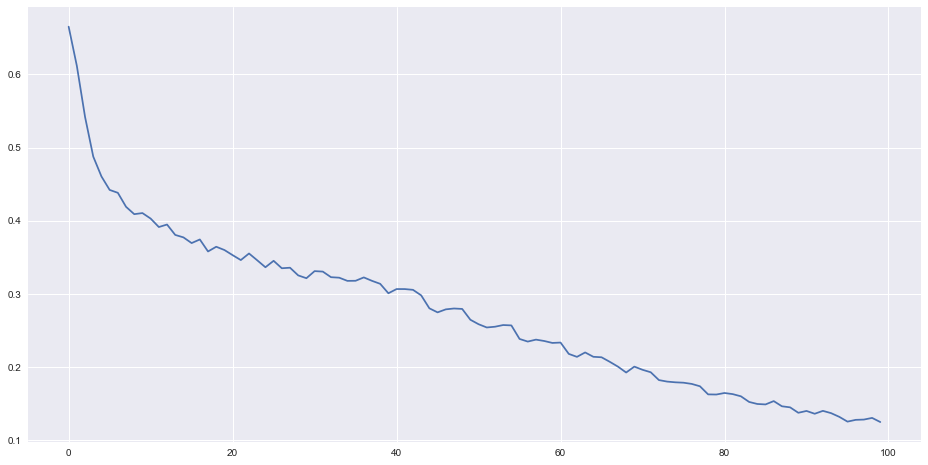

In [25]:
plt.plot(hist.history['loss'])

In [26]:
vectors = SkipGram.get_weights()[0]


In [80]:
import umap
umap_art = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(vectors)


In [81]:
Uembedding=umap_art.transform(vectors)

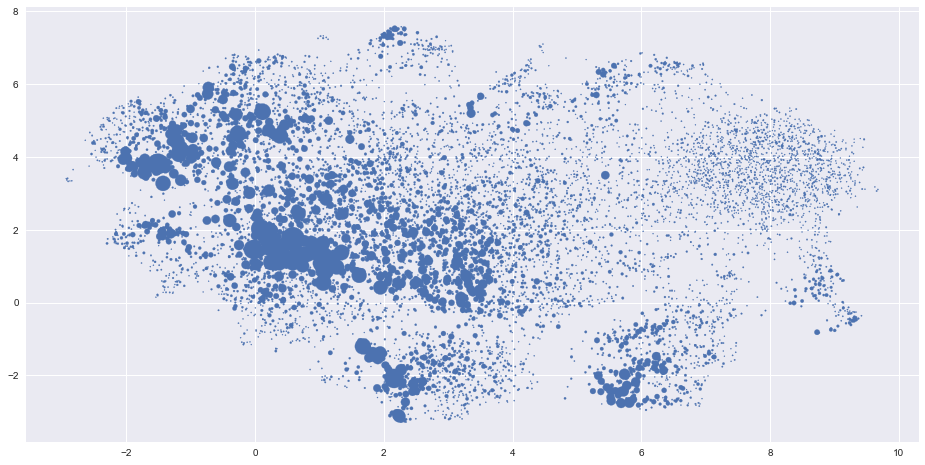

In [82]:
plt.scatter(Uembedding[:,0],Uembedding[:,1],s=spt/8)

In [30]:
playlist_track = [filter(lambda w: w.split("_")[0]==u"track",playlist) for playlist in data]

In [31]:
playlist_track

[[u'track_3248376',
  u'track_68116150',
  u'track_68116150',
  u'track_3169189',
  u'track_6523608',
  u'track_407020492',
  u'track_6523613',
  u'track_348627211',
  u'track_348627221',
  u'track_348627231',
  u'track_348627241',
  u'track_348627251',
  u'track_348627261',
  u'track_348627271',
  u'track_348627281',
  u'track_348627291'],
 [u'track_354917971',
  u'track_354917981',
  u'track_354917991',
  u'track_354918001',
  u'track_354918011',
  u'track_405992352',
  u'track_383552261',
  u'track_397746652',
  u'track_385499681',
  u'track_402932992',
  u'track_398786652',
  u'track_357037431',
  u'track_378113751',
  u'track_354918011',
  u'track_403520542',
  u'track_393157072',
  u'track_354165291',
  u'track_357083271',
  u'track_361171651',
  u'track_145501426',
  u'track_397141342',
  u'track_145370202'],
 [u'track_632216',
  u'track_632222',
  u'track_632224',
  u'track_131150472',
  u'track_131150474',
  u'track_131150476'],
 [u'track_143783500',
  u'track_353166711',
  u'

In [32]:
tracks = np.unique(np.concatenate(playlist_track))
Vt = len(tracks)
Vt

338509

In [33]:
track_counts = dict((tracks[i],0) for i in xrange(0, Vt))
for p in playlist_track:
    for a in p:
        track_counts[a]=track_counts[a]+1;
track_counts

{u'track_134876850': 7,
 u'track_134876852': 5,
 u'track_134876854': 3,
 u'track_138547209': 1,
 u'track_134876856': 11,
 u'track_138547207': 1,
 u'track_373970241': 90,
 u'track_138547205': 1,
 u'track_138547203': 1,
 u'track_69025965': 1,
 u'track_138547201': 1,
 u'track_101502768': 1,
 u'track_3590282': 33,
 u'track_90664613': 1,
 u'track_376514611': 1,
 u'track_117316340': 1,
 u'track_395012692': 8,
 u'track_145590482': 8,
 u'track_70574777': 1,
 u'track_105270106': 1,
 u'track_128643019': 1,
 u'track_70114347': 1,
 u'track_70114344': 6,
 u'track_6867968': 1,
 u'track_70114342': 10,
 u'track_70114343': 3,
 u'track_101816397': 1,
 u'track_101816399': 1,
 u'track_131285470': 1,
 u'track_99402232': 1,
 u'track_72545466': 1,
 u'track_90400507': 2,
 u'track_368528941': 2,
 u'track_79468439': 1,
 u'track_387264551': 1,
 u'track_63395717': 2,
 u'track_60018081': 3,
 u'track_713332': 1,
 u'track_398863852': 3,
 u'track_884180': 1,
 u'track_3366554': 3,
 u'track_3366551': 4,
 u'track_940147

In [34]:
playlist_track_filter = [filter(lambda a : track_counts[a]> 5, playlist) for playlist in playlist_track]
track_f = np.unique(np.concatenate(playlist_track_filter))
Vt = len(track_f)

In [35]:
Vt

31426

In [37]:
track_dict = dict((track_f[i],i) for i in xrange(0, Vt))
corpus_num_track = [[track_dict[track] for track in play ] for play in playlist_track_filter]

In [50]:
corpus_num_track

[[14064, 25248, 25248, 14034, 24469, 24470],
 [15122,
  15123,
  15124,
  15125,
  15126,
  21818,
  18705,
  20575,
  19007,
  21398,
  20786,
  15367,
  17908,
  15126,
  21439,
  19839,
  15040,
  15384,
  15839,
  11268,
  20466,
  11149],
 [24200, 6036],
 [10503, 14936, 21405, 14733, 16917, 16448, 7816, 4671],
 [18970, 18973, 11266],
 [1834,
  1835,
  1836,
  1837,
  1838,
  1839,
  1840,
  1841,
  1842,
  1843,
  1844,
  1845,
  1846,
  1834,
  1835],
 [],
 [13585, 13600, 13601, 13602, 13603, 13607],
 [18909, 18913, 18911, 18912, 18908],
 [21761,
  21762,
  21763,
  21764,
  21765,
  21766,
  21767,
  21768,
  21769,
  21770,
  21771,
  21772,
  21773,
  21774,
  21775,
  21776,
  21777,
  21778],
 [25842, 25843, 25844, 25844, 25845, 25842],
 [22355,
  8332,
  16941,
  17202,
  21124,
  15958,
  17430,
  16945,
  17040,
  14822,
  15660,
  9692,
  5112],
 [7290],
 [],
 [],
 [27219, 14505, 27219, 14505],
 [5080, 5080],
 [],
 [77, 4068, 7757, 18317, 77, 11321, 2803, 18705, 2480],
 

In [51]:
input_target_t = Input((1,), dtype='int32')
input_context_t = Input((1,), dtype='int32')

embedding_t_t = Embedding(Vt, vector_dim, input_length=1, name='embedding_t')
target_t = embedding_t_t(input_target_t)
target_t = Reshape((vector_dim, 1))(target_t)
context_t = embedding_t_t(input_context_t)
context_t = Reshape((vector_dim, 1))(context_t)

dot_product_t = Dot(axes=0)([target_t, context_t])
dot_product_t = Reshape((1,))(dot_product_t)

output_t = Dense(1, activation='sigmoid',name="classif")(dot_product_t)
SkipGram_t = Model(inputs=[input_target_t, input_context_t], outputs=output_t)
SkipGram_t.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
tracks_counts_f = dict((track_f[i],0) for i in xrange(0, Vt))
for p in playlist_track_filter:
    for t in p:
        tracks_counts_f[t]=tracks_counts_f[t]+1;
spt_tracks=np.array(map(lambda a:tracks_counts_f[a],track_f),np.float)
#spt=spt/np.sum(spt)
#spt

In [61]:
sptn_tracks=np.power(spt_tracks,-0.05)
sptn_tracks=sptn_tracks/np.sum(sptn_tracks)
sptn_tracks=np.cumsum(np.sort(sptn_tracks)[::-1])
sptn_tracks

array([  3.62199880e-05,   7.24369633e-05,   1.08650883e-04, ...,
         1.73133671e-01,   1.73133679e-01,   1.73133683e-01])

In [70]:
import random
def track_ns_generator(corpus_num,nbm):
    while 1:
        Data=[]
        Labels=[]
        for i, doc in enumerate(random.sample(corpus_num,nbm)):
            data, labels = skipgrams(sequence=doc, vocabulary_size=Vt, window_size=5, negative_samples=4.)
            if (len(data)>0):
                Data.append(np.array(data, dtype=np.int32))
                Labels.append(np.array(labels, dtype=np.int32))
        Data=np.concatenate(Data)
        Labels=np.concatenate(Labels)
        x=[Data[:,0],Data[:,1]]
        y=Labels
        yield (x,y)

In [71]:
track_artist_dict = dict((track_f[i],"") for i in xrange(0, Vt))
track_artist_num = dict((track_f[i],0) for i in xrange(0, Vt))
for p in data :
    for i in xrange(0,len(p),2):
        try:
            track_artist_dict[p[i]]=p[i+1];
        except:
            track_artist_dict[p[i]]=""
        try:
            track_artist_num[p[i]]=artists_dict[p[i+1]]
        except:
            track_artist_num[p[i]]=-1
                
track_artist_num

{u'track_134876850': 1228,
 u'track_38358651': 1,
 u'track_134876854': 1228,
 u'track_138547209': -1,
 u'track_134876856': 1228,
 u'track_138547207': -1,
 u'track_373970241': 2157,
 u'track_138547205': -1,
 u'track_112279860': -1,
 u'track_138547203': -1,
 u'track_138547201': -1,
 u'track_72545467': 8672,
 u'track_3590282': 4174,
 u'track_134876852': 1228,
 u'track_383206971': -1,
 u'track_117316340': 8371,
 u'track_2276365': 6062,
 u'track_395012692': -1,
 u'track_3590289': 8958,
 u'track_73799852': -1,
 u'track_70114347': 6148,
 u'track_70114344': 6148,
 u'track_6867968': 7348,
 u'track_70114342': 6148,
 u'track_70114343': 6148,
 u'track_71299900': 754,
 u'track_101816399': -1,
 u'track_86877383': 8917,
 u'track_99402232': -1,
 u'track_62376155': 8947,
 u'track_135874274': -1,
 u'track_90400507': -1,
 u'track_368528941': 1861,
 u'track_2885569': -1,
 u'track_387264551': 2089,
 u'track_63395717': -1,
 u'track_60018081': -1,
 u'track_713332': -1,
 u'track_398863852': 731,
 u'track_3366

In [72]:
embed_init=np.zeros((Vt,vector_dim))
for i in xrange(0,Vt):
    if (i!=-1):
        embed_init[i,:]=vectors[track_artist_num[track_f[i]],:];
embed_init.shape
        
    

(31426, 64)

In [86]:
SkipGram_t.get_layer("embedding_t").set_weights([embed_init])

In [87]:
SkipGram_t.get_layer("classif").set_weights(SkipGram.get_layer("classif").get_weights())

In [88]:
hist=SkipGram_t.fit_generator(track_ns_generator(corpus_num_track,10),200,40)


Epoch 1/40
200/200 [==============================] - 3s - loss: 0.5677     
Epoch 2/40
200/200 [==============================] - 3s - loss: 0.4898     
Epoch 3/40
200/200 [==============================] - 2s - loss: 0.4315     
Epoch 4/40
200/200 [==============================] - 2s - loss: 0.4145     
Epoch 5/40
200/200 [==============================] - 2s - loss: 0.4029     
Epoch 6/40
200/200 [==============================] - 2s - loss: 0.3735     
Epoch 7/40
200/200 [==============================] - 2s - loss: 0.3955     
Epoch 8/40
200/200 [==============================] - 2s - loss: 0.3649     
Epoch 9/40
200/200 [==============================] - 3s - loss: 0.3528     
Epoch 10/40
200/200 [==============================] - 2s - loss: 0.3465     
Epoch 11/40
200/200 [==============================] - 2s - loss: 0.3398     
Epoch 12/40
200/200 [==============================] - 2s - loss: 0.3313     
Epoch 13/40
200/200 [==============================] - 2s - loss: 0.3170 

In [89]:
vectors_tracks = SkipGram_t.get_weights()[0]

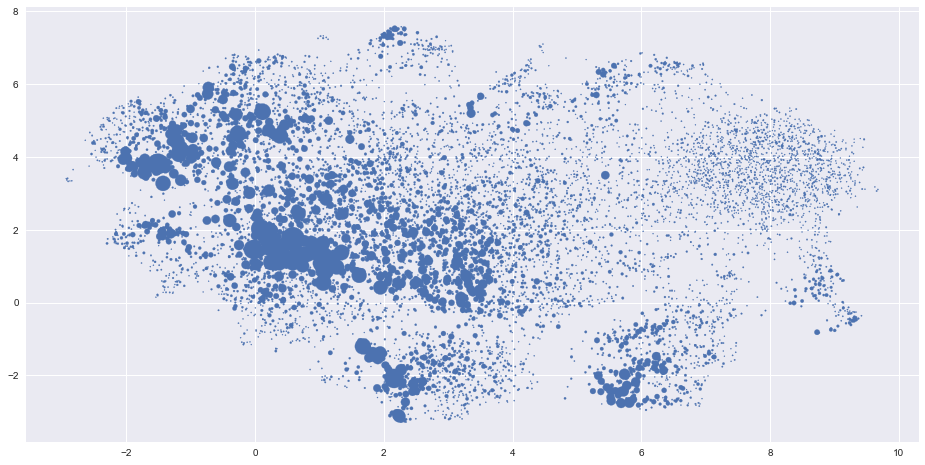

In [90]:
plt.scatter(Uembedding[:,0],Uembedding[:,1],s=spt/8)

In [91]:
Uembedding_tracks=umap_art.transform(vectors_tracks)

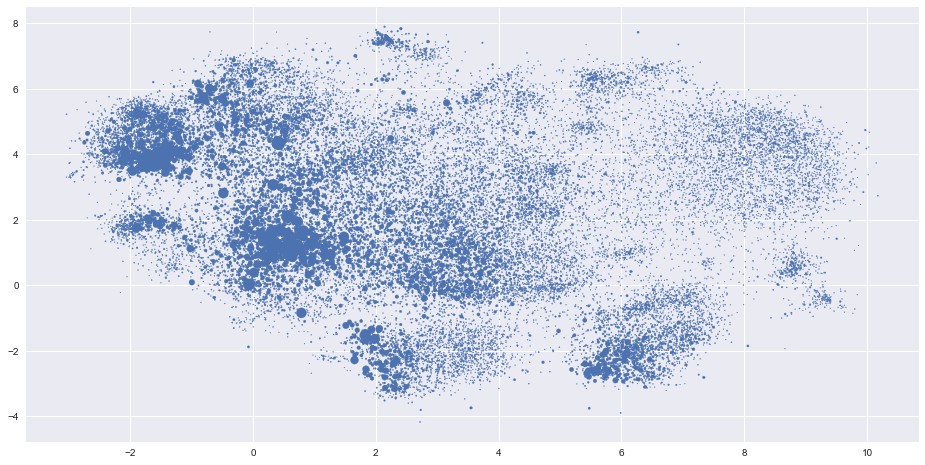

In [92]:
plt.scatter(Uembedding_tracks[:,0],Uembedding_tracks[:,1],spt_tracks/10)

In [109]:
anum = np.array(map(lambda ti:artists_f[track_artist_num[track_f[ti]]], xrange(0,Vt)))

In [110]:
anum

array([u'artist_7912872', u'artist_1188', u'artist_1188', ...,
       u'artist_647650', u'artist_565873', u'artist_734'],
      dtype='<U15')

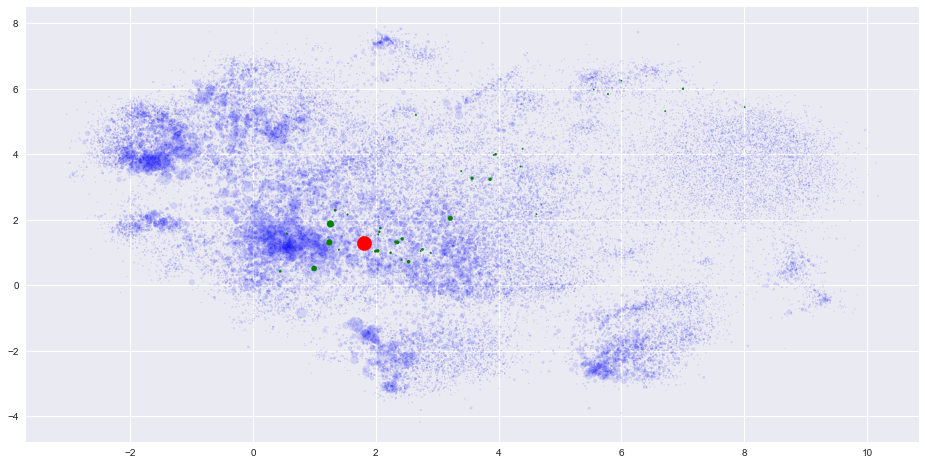

In [128]:
aid=u'artist_27'
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(Uembedding_tracks[:,0],Uembedding_tracks[:,1],spt_tracks/10,alpha=0.1,c="b")
ax1.scatter(Uembedding[:,0],Uembedding[:,1],spt/10,c="b",alpha=0.1)
ax1.scatter(Uembedding_tracks[anum==aid,0],Uembedding_tracks[anum==aid,1],spt_tracks[anum==aid]/10*3,c='g')
ax1.scatter(Uembedding[artists_f==aid,0],Uembedding[artists_f==aid,1],spt[artists_f==aid]/10*3,c="r")
fig.show()

In [117]:
len(artists_f)

9294

In [144]:
import pandas as pd
import urllib
import json
import time

In [147]:
df=[];
for a in artists_f:
    try :
        url = "http://api.deezer.com/artist/"+a.split("_")[1]
        response = urllib.urlopen(url)
        data = json.loads(response.read())
        df.append(data)
    except:
        print "except {a}".format(a=a)
    time.sleep(5./60)

In [149]:
dfa=pd.DataFrame(df)

In [142]:
'http://api.deezer.com/artist/'+artists_f[1].split("_")[1]

u'http://api.deezer.com/artist/10'

In [150]:
dfa

,error,id,link,name,nb_album,nb_fan,picture,picture_big,picture_medium,picture_small,picture_xl,radio,share,tracklist,type
0,NaN,1.0,http://www.deezer.com/artist/1,The Beatles,42.0,5026969.0,http://api.deezer.com/artist/1/image,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,True,https://www.deezer.com/artist/1?utm_source=dee...,http://api.deezer.com/artist/1/top?limit=50,artist
1,NaN,10.0,http://www.deezer.com/artist/10,Faithless,33.0,553749.0,http://api.deezer.com/artist/10/image,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,True,https://www.deezer.com/artist/10?utm_source=de...,http://api.deezer.com/artist/10/top?limit=50,artist
2,NaN,1000.0,http://www.deezer.com/artist/1000,Gilbert Bécaud,429.0,38588.0,http://api.deezer.com/artist/1000/image,http://e-cdn-images.deezer.com/images/artist/d...,http://e-cdn-images.deezer.com/images/artist/d...,http://e-cdn-images.deezer.com/images/artist/d...,http://e-cdn-images.deezer.com/images/artist/d...,True,https://www.deezer.com/artist/1000?utm_source=...,http://api.deezer.com/artist/1000/top?limit=50,artist
3,NaN,10002824.0,http://www.deezer.com/artist/10002824,Playboi Carti,6.0,13338.0,http://api.deezer.com/artist/10002824/image,http://e-cdn-images.deezer.com/images/artist/c...,http://e-cdn-images.deezer.com/images/artist/c...,http://e-cdn-images.deezer.com/images/artist/c...,http://e-cdn-images.deezer.com/images/artist/c...,True,https://www.deezer.com/artist/10002824?utm_sou...,http://api.deezer.com/artist/10002824/top?limi...,artist
4,NaN,1000623.0,http://www.deezer.com/artist/1000623,Arcane Roots,16.0,4937.0,http://api.deezer.com/artist/1000623/image,http://cdn-images.deezer.com/images/artist/279...,http://cdn-images.deezer.com/images/artist/279...,http://cdn-images.deezer.com/images/artist/279...,http://cdn-images.deezer.com/images/artist/279...,True,https://www.deezer.com/artist/1000623?utm_sour...,http://api.deezer.com/artist/1000623/top?limit=50,artist
5,NaN,1000791.0,http://www.deezer.com/artist/1000791,BRAV,15.0,6017.0,http://api.deezer.com/artist/1000791/image,http://e-cdn-images.deezer.com/images/artist/a...,http://e-cdn-images.deezer.com/images/artist/a...,http://e-cdn-images.deezer.com/images/artist/a...,http://e-cdn-images.deezer.com/images/artist/a...,True,https://www.deezer.com/artist/1000791?utm_sour...,http://api.deezer.com/artist/1000791/top?limit=50,artist
6,NaN,1000798.0,http://www.deezer.com/artist/1000798,Mato Seco,16.0,101173.0,http://api.deezer.com/artist/1000798/image,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,http://e-cdn-images.deezer.com/images/artist/5...,True,https://www.deezer.com/artist/1000798?utm_sour...,http://api.deezer.com/artist/1000798/top?limit=50,artist
7,NaN,1000815.0,http://www.deezer.com/artist/1000815,Recondite,26.0,23003.0,http://api.deezer.com/artist/1000815/image,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,http://e-cdn-images.deezer.com/images/artist/e...,True,https://www.deezer.com/artist/1000815?utm_sour...,http://api.deezer.com/artist/1000815/top?limit=50,artist
8,NaN,10008812.0,http://www.deezer.com/artist/10008812,Duñe,5.0,2156.0,http://api.deezer.com/artist/10008812/image,http://e-cdn-images.deezer.com/images/artist/f...,http://e-cdn-images.deezer.com/images/artist/f...,http://e-cdn-images.deezer.com/images/artist/f...,http://e-cdn-images.deezer.com/images/artist/f...,True,https://www.deezer.com/artist/10008812?utm_sou...,http://api.deezer.com/artist/10008812/top?limi...,artist
9,NaN,10009386.0,http://www.deezer.com/artis

In [ ]:
dft=[];
for t in track_f:
    try :
        url = "http://api.deezer.com/track/"+t.split("_")[1]
        response = urllib.urlopen(url)
        data = json.loads(response.read())
        dft.append(data)
    except:
        print "except {a}".format(a=a)
    time.sleep(5./60)